# Confidence Intervals with T Distribution - Lab

## Introduction

In the previous lab we saw that if we have the standard deviation for the population, we can use use z-score to calculate our confidence interval using the mean of sample means. 

If, on the other hand, standard deviation of the population is not known (which is usually the case), you have to use the standard deviation of your sample as a stand in when creating confidence intervals. Since the sample standard deviation is often different then that of the population, further potential errors are introduced to our confidence intervals. To account for this error, we use what's known as a t-critical value instead of the z-critical value.

The t-critical value is drawn from what's known as a t-distribution
> A t-distribution  closely resembles the normal distribution but  gets wider and wider as the sample size falls.

![](images/t-distr-img.gif)

The t-distribution is available in scipy.stats with the nickname "t" so we can get t-critical values with `stats.t.ppf()`.

## Objectives
You will be able to:

* Understand the concept of a confidence interval and be able to construct one for a mean

* Demonstrate how to use the t-distribution for constructing intervals for small sample sizes

* Express a correct interpretation of confiendence intervals

## Let's get started!

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math

Let's investigate point estimates by generating a population of random age data collected a two different locations and then drawing a sample from it to estimate the mean:

In [ ]:
np.random.seed(20)
population_ages1 = np.random.normal(20, 4, 10000) 
population_ages2 = np.random.normal(22, 3, 10000) 
population_ages = np.concatenate((population_ages1, population_ages2))

pop_ages = pd.DataFrame(population_ages)
pop_ages.hist(bins=100,range=(5,33),figsize=(9,9))
pop_ages.describe()

,0
count,20000.000000
mean,21.008578
std,3.671277
min,4.784588
25%,18.662256
50%,21.163276
75%,23.489438
max,36.140116


Let's take a new, smaller sample (<30) and calculate how much sample mean differs from population mean.

In [3]:
np.random.seed(23)

sample_size = 25
sample = np.random.choice(pop_ages[0], 25) # Take a random sample of size 25 from above population
sample_mean = np.mean(sample)  # Calculate sample mean 
mean_difference = abs(sample_mean-np.mean(pop_ages[0]))

# Print sample mean and difference of sample and population mean 

# Sample Mean: 19.870788629471857
# Mean Difference: 1.1377888781920937

In [4]:
print(sample_mean)
print(mean_difference)

19.870788629471857
1.1377888781920937


We can see that sample mean differs from population mean by 1.13 years. We can calculate a confidence interval without the population standard deviation, using the t-distribution using `stats.t.ppf(q, df)` function. This function takes in a value for confidence level required (q) with "degree of freedom" (df) .

> degrees of freedom = sample_size -1.

In [5]:
# Cal culate the t-critical value for 95% confidence level for sample taken above. 
t_critical = stats.t.ppf(0.975, sample_size)   # Get the t-critical value  by using 95% confidence level and degree of freedom
print("t-critical value:", t_critical)                  # Check the t-critical value
#print(t_critical)     

# t-critical value:
# 2.0638985616280205

t-critical value: 2.059538552753294


Calculate the confidence interval of the sample by sigma and calculating margin of error as:
> **sigma = sample_std/√n**

> **Margin of Error = t-critical-value * sigma**

and finally the confidence interval can be calculated as : 

> **Confidence interval = (sample_mean + margin of error, sample_mean - margin of error)**

In [6]:
# Calculate the sample standard deviation
sample_stdev = np.std(sample)    # Get the sample standard deviation

# Calculate sigma using the formula described above to get population standard deviation estimate
sigma = np.std(pop_ages[0])/math.sqrt(sample_size)

# Calculate margin of error using t_critical and sigma
margin_of_error = sigma*t_critical

# Calculate the confidence intervals using calculated margin of error 
confidence_interval = [sample_mean- margin_of_error, sample_mean+margin_of_error]


print("Confidence interval:", confidence_interval)
#print(confidence_interval)

# Confidence interval:
# (18.4609156900928, 21.280661568850913)

Confidence interval: [18.358599171143133, 21.38297808780058]


We can verify our calculations by using the Python function stats.t.interval():

In [7]:
stats.t.interval(alpha = 0.95,              # Confidence level
                 df= 24,                    # Degrees of freedom
                 loc = sample_mean,         # Sample mean
                 scale = sigma)             # Standard deviation estimate

(18.355397891201193, 21.38617936774252)

We can see that the calculated confidence interval includes the population mean calculated above.

Lets run the code multiple times to see how often our estimated confidence interval covers the population mean value:

**Write a function using code above that takes in sample data and returns confidence intervals**



In [8]:
# Function to take in sample data and calculate the confidence interval
def conf_interval(sample):
    '''
    Input:  sample 
    Output: Confidence interval
    '''
    n = len(sample)
    x_hat = sample.mean()
    # Calculate the z-critical value using stats.norm.ppf()
    # Note that we use stats.t.ppf with q = 0.975 to get the desired t-critical value 
    # instead of q = 0.95 because the distribution has two tails.

    t = stats.t.ppf(0.975)  #  t-critical value for 95% confidence
    
    sigma = np.std(sample)/math.sqrt(n) # Sample standard deviation

    # Calculate the margin of error using formula given above
    moe = t*sigma

    # Calculate the confidence interval by applying margin of error to sample mean 
    # (mean - margin of error, mean+ margin of error)
    conf = [x_hat-moe, x_hat+moe]
    
    return conf

**Call the function 25 times taking different samples at each iteration and calculating sample mean and confidence intervals**

In [9]:
# set random seed for reproducability
np.random.seed(12)

# Select the sample size 
sample_size = 25

# Initialize lists to store interval and mean values
intervals = []
sample_means = []

# Run a for loop for sampling 25 times and calculate + store confidence interval and sample mean values in lists initialised above

for sample in range(25):
    # Take a random sample of chosen size 
    sample = np.random.choice(a= population_ages, size = sample_size)
    
    # Calculate confidence_interval from function above
    confidence_interval = conf_interval(sample)    

    # Calculate the sample mean 
    sample_mean = sample.mean()
    
    # Calculate and append sample means and conf intervals for each iteration
    sample_means.append(sample_mean)
    intervals.append(confidence_interval)


SyntaxError: unexpected EOF while parsing (<ipython-input-9-11ce1238b635>, line 21)

**Plot the confidence intervals along with sample means and population mean**

In [ ]:
# Plot the confidence intervals with sample and population means
# Draw the mean and confidence interval for each sample
# Draw the population mean 

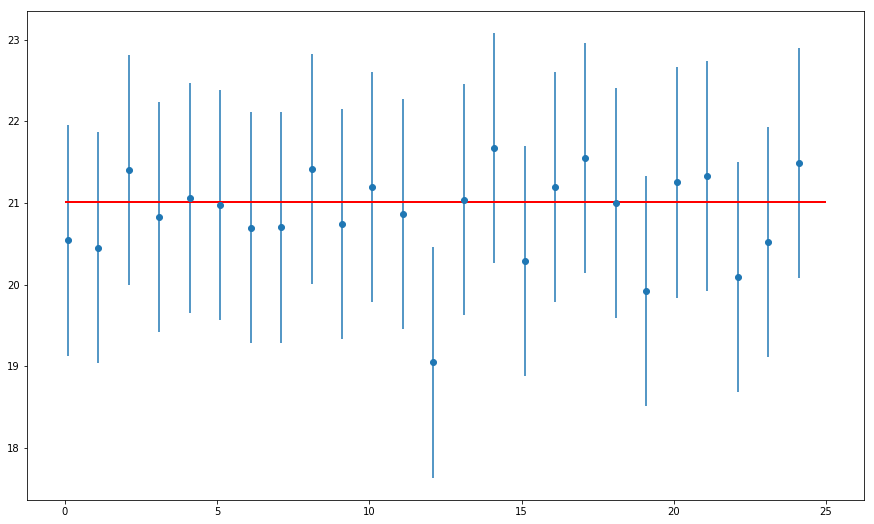

Just like the last lab, all but one of the 95% confidence intervals overlap the red line marking the true mean. This is to be expected: since a 95% confidence interval captures the true mean 95% of the time, we'd expect our interval to miss the true mean 5% of the time.

## Summary

In this lab we learnt how to use confidence intervals when population standard deviation is not known, and the sample size is small (<30) . We also saw how to construct them from random samples. The lesson differentiates between the use cases for z-score and t-distribution. We also saw how t value can be used to define the confidence interval based on confidence level. 